Чтобы работало корректно, каждый раз необходимо запускать с начала (отсюда)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
points = []

# Параметры кластеров
num_clusters = 3
cluster_size = 20
num_points = num_clusters * cluster_size

# Центры кластеров (можно занулить)
# means_x = [10]
# means_y = [5]

# Разброс
std = 3

for i in range(num_points):
    x_i = np.random.normal(scale=std)
    y_i = np.random.normal(scale=std)
    points.append((x_i, y_i))

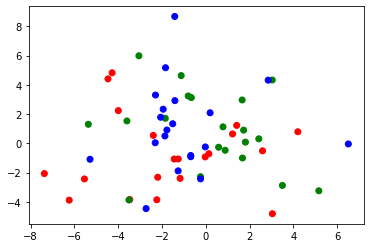

In [3]:
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))
colors = ['r'] * cluster_size + ['g'] * cluster_size + ['b'] * cluster_size
plt.scatter(x=points_x, y=points_y, c=colors)

In [125]:
# Код алгоритма
def k_nn(points, num_neighbors, control_point):
    """
    @param points: список из пар координат точек
    @param num_neighbors: число соседей, по которым будем определять класс контрольной точки

    @return: номер кластера, к которому её отнесли
    """
    num_points = len(points)
    
    points.append(control_point)
    colors.append('violet')
    
    # Выведем на экран стартовую ситуацию
    print("Входные данные")
    points_x = list(map(lambda x: x[0], points))
    points_y = list(map(lambda x: x[1], points))
    plt.scatter(x=points_x, y=points_y, c=colors)
    plt.show()
    
    points.pop()
    colors.pop()

    
    control_point_x = control_point[0]
    control_point_y = control_point[1]
    
    # Находим расстояния от каждой из точек на плоскости до контрольной
    dist = []
    for i in range(num_points):
        r = (points_x[i] - control_point_x)**2 + (points_y[i] - control_point_y)**2
        dist.append(r) 
    dist_sort = sorted(dist)
    
    # получаем индексы k ближайших точек
    index = []
    for i in range(num_neighbors):
        index.append(dist.index(dist_sort[i]) // cluster_size)
    index = np.array(index)
    
    neighbor_class = []
    for k in range(num_clusters):
        neighbor_class.append((index==k).sum())
    
    result = neighbor_class.index(max(neighbor_class))

    return result    

Входные данные


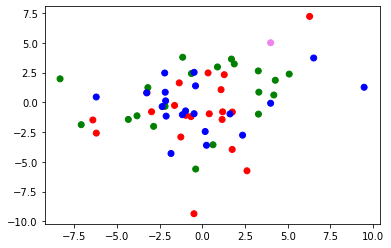

1

In [126]:
num_neighbors = 1
control_point = (4, 5)
k_nn(points, num_neighbors, control_point)

0 - red,
1 - green,
2 - blue.